In [37]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn import preprocessing
from pgmpy.models import LinearGaussianBayesianNetwork
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE, display_plot_ipython
from causalnex.structure import StructureModel
from pyvis import network
import networkx as nx
from causalnex.network import BayesianNetwork
from matplotlib import pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from causalnex.evaluation import classification_report
from causalnex.inference import InferenceEngine

Data using downloaded files

In [38]:
X: pd.DataFrame
y: pd.DataFrame

arff_file_year_5 = arff.loadarff('PolishBankruptcy/5year.arff')

df = pd.DataFrame(arff_file_year_5[0])
print("data frame")
df

data frame


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.011340,1.02050,-66.5200,0.342040,0.109490,0.57752,1.08810,0.320360,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,b'0'
1,-0.006202,0.48465,0.232980,1.59980,6.1825,0.000000,-0.006202,1.06340,1.27570,0.515350,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.37000,b'0'
2,0.130240,0.22142,0.577510,3.60820,120.0400,0.187640,0.162120,3.05900,1.14150,0.677310,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.61880,b'0'
3,-0.089951,0.88700,0.269270,1.52220,-55.9920,-0.073957,-0.089951,0.12740,1.27540,0.113000,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.92990,b'0'
4,0.048179,0.55041,0.107650,1.24370,-22.9590,0.000000,0.059280,0.81682,1.51500,0.449590,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.000000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.578050,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.179050,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.108860,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


Standardizing Data

In [39]:
data = df.dropna()
data
scaler = preprocessing.StandardScaler() 
data_scaled = scaler.fit_transform(data)
data_scaled_transposed = data_scaled.transpose()


attribute_names = [
    "X1_net_profit_over_total_assets",
    "X2_total_liabilities_over_total_assets",
    "X3_working_capital_over_total_assets",
    "X4_current_assets_over_short_term_liabilities",
    "X5_[(cash_+_short_term_securities_+_receivables_-_short_term_liabilities)_over_(operating_expenses_-_depreciation)]_*_365",
    "X6_retained_earnings_over_total_assets",
    "X7_EBIT_over_total_assets",
    "X8_book_value_of_equity_over_total_liabilities",
    "X9_sales_over_total_assets",
    "X10_equity_over_total_assets",
    "X11_(gross_profit_+_extraordinary_items_+_financial_expenses)_over_total_assets",
    "X12_gross_profit_over_short_term_liabilities",
    "X13_(gross_profit_+_depreciation)_over_sales",
    "X14_(gross_profit_+_interest)_over_total_assets",
    "X15_(total_liabilities_*_365)_over_(gross_profit_+_depreciation)",
    "X16_(gross_profit_+_depreciation)_over_total_liabilities",
    "X17_total_assets_over_total_liabilities",
    "X18_gross_profit_over_total_assets",
    "X19_gross_profit_over_sales",
    "X20_(inventory_*_365)_over_sales",
    "X21_sales_(n)_over_sales_(n_1)",
    "X22_profit_on_operating_activities_over_total_assets",
    "X23_net_profit_over_sales",
    "X24_gross_profit_(in_3_years)_over_total_assets",
    "X25_(equity_-_share_capital)_over_total_assets",
    "X26_(net_profit_+_depreciation)_over_total_liabilities",
    "X27_profit_on_operating_activities_over_financial_expenses",
    "X28_working_capital_over_fixed_assets",
    "X29_logarithm_of_total_assets",
    "X30_(total_liabilities_-_cash)_over_sales",
    "X31_(gross_profit_+_interest)_over_sales",
    "X32_(current_liabilities_*_365)_over_cost_of_products_sold",
    "X33_operating_expenses_over_short_term_liabilities",
    "X34_operating_expenses_over_total_liabilities",
    "X35_profit_on_sales_over_total_assets",
    "X36_total_sales_over_total_assets",
    "X37_(current_assets_-_inventories)_over_long_term_liabilities",
    "X38_constant_capital_over_total_assets",
    "X39_profit_on_sales_over_sales",
    "X40_(current_assets_-_inventory_-_receivables)_over_short_term_liabilities",
    "X41_total_liabilities_over_((profit_on_operating_activities_+_depreciation)_*_(12/365))",
    "X42_profit_on_operating_activities_over_sales",
    "X43_rotation_receivables_+_inventory_turnover_in_days",
    "X44_(receivables_*_365)_over_sales",
    "X45_net_profit_over_inventory",
    "X46_(current_assets_-_inventory)_over_short_term_liabilities",
    "X47_(inventory_*_365)_over_cost_of_products_sold",
    "X48_EBITDA_(profit_on_operating_activities_-_depreciation)_over_total_assets",
    "X49_EBITDA_(profit_on_operating_activities_-_depreciation)_over_sales",
    "X50_current_assets_over_total_liabilities",
    "X51_short_term_liabilities_over_total_assets",
    "X52_(short_term_liabilities_*_365)_over_cost_of_products_sold)",
    "X53_equity_over_fixed_assets",
    "X54_constant_capital_over_fixed_assets",
    "X55_working_capital",
    "X56_(sales_-_cost_of_products_sold)_over_sales",
    "X57_(current_assets_-_inventory_-_short_term_liabilities)_over_(sales_-_gross_profit_-_depreciation)",
    "X58_total_costs_over_total_sales",
    "X59_long_term_liabilities_over_equity",
    "X60_sales_over_inventory",
    "X61_sales_over_receivables",
    "X62_(short_term_liabilities_*365)_over_sales",
    "X63_sales_over_short_term_liabilities",
    "X64_sales_over_fixed_assets",
    "class"
]


attribute_dict = {}

for i in range(len(data_scaled_transposed)):
    attribute_dict[attribute_names[i]] = data_scaled_transposed[i]

#attribute_dict[attribute_names[len(data_scaled_transposed)-1]] = pd.cut(data_scaled_transposed[len(data_scaled_transposed)-1],2,labels=False)
PreprocessedData = pd.DataFrame(attribute_dict)
PreprocessedData


,X1_net_profit_over_total_assets,X2_total_liabilities_over_total_assets,X3_working_capital_over_total_assets,X4_current_assets_over_short_term_liabilities,X5_[(cash_+_short_term_securities_+_receivables_-_short_term_liabilities)_over_(operating_expenses_-_depreciation)]_*_365,X6_retained_earnings_over_total_assets,X7_EBIT_over_total_assets,X8_book_value_of_equity_over_total_liabilities,X9_sales_over_total_assets,X10_equity_over_total_assets,...,X56_(sales_-_cost_of_products_sold)_over_sales,X57_(current_assets_-_inventory_-_short_term_liabilities)_over_(sales_-_gross_profit_-_depreciation),X58_total_costs_over_total_sales,X59_long_term_liabilities_over_equity,X60_sales_over_inventory,X61_sales_over_receivables,X62_(short_term_liabilities_*365)_over_sales,X63_sales_over_short_term_liabilities,X64_sales_over_fixed_assets,class
0,0.006675,0.020298,-0.549991,-0.177912,-0.026821,0.015309,0.023533,-0.436021,-0.212378,-0.037228,...,0.047814,0.056445,-0.063337,-0.061398,-0.060586,-0.168680,0.260014,-0.600041,-0.060357,-0.186612
1,-0.018488,0.019749,-0.191139,-0.141493,0.001511,-0.018198,0.018192,-0.325335,0.098282,-0.016289,...,0.956961,-0.010545,-0.379795,-0.037031,-0.056483,-0.195352,0.006140,-0.425176,-0.059265,-0.186612
2,0.013740,0.026062,0.804600,-0.074725,0.028825,0.002457,0.025071,-0.394679,-0.205756,-0.024309,...,0.091297,0.045787,-0.079589,-0.050342,-0.063188,-0.262796,0.170987,-0.549862,0.242290,-0.186612
3,0.000569,-0.024245,-0.205000,0.111450,0.067035,0.017573,0.021820,1.085581,-0.107515,0.039603,...,0.660574,-0.013864,-0.292251,-0.028822,-0.054666,-0.233976,-0.363210,0.252860,-0.090091,-0.186612
4,0.029792,-0.005250,0.578431,0.098201,0.028113,0.011754,0.028740,0.139460,-0.104604,0.015470,...,0.675798,0.023900,-0.297938,-0.014784,-0.064185,-0.126393,-0.319424,0.109898,-0.071364,-0.186612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,-0.038095,0.045845,-0.288298,-0.160567,-0.111731,-0.017933,0.013690,-0.553075,-0.358066,-0.049443,...,0.741028,-0.025637,0.041929,-0.056773,-0.058150,-0.165322,1.110662,-0.835865,-0.060690,5.358702
3027,0.025709,0.015801,0.810300,-0.024371,-0.035626,-0.018198,0.024496,-0.275270,-0.146884,-0.011274,...,0.310132,0.044995,-0.145683,-0.015762,-0.068236,-0.067293,0.110051,-0.509422,-0.040946,5.358702
3028,0.021821,0.171451,-2.508343,-0.273537,-0.037083,-0.049744,0.023837,-0.899835,1.480498,-0.209015,...,-0.532193,-0.113658,0.025422,-0.260901,-0.052375,0.985693,-0.058324,-0.359948,-0.034938,5.358702
3029,-0.105120,0.119174,-1.764744,-0.234362,-0.064551,-0.141702,0.002338,-0.817851,0.620561,-0.142574,...,0.842352,0.055115,-0.328951,-0.137811,-0.063941,0.279127,0.366930,-0.649658,-0.026667,5.358702


Removal of Features

Selecting financial ratio features as per study dine by [Chen and Shimerda 1981] Kung H Chen and Thomas A Shimerda. An empirical analysis of useful
financial ratios. Financial management, pages 51–60, 1981.

Features I need: 

X23	net profit / sales \
X1	net profit / total assets \
X7	EBIT / total assets \
X49	EBITDA (profit on operating activities - depreciation) / sales \
X9	sales / total assets \
X3	working capital / total assets \
X2	total liabilities / total assets \
X59	long-term liabilities / equity \
X6	retained earnings / total assets \
X4	current assets / short-term liabilities \
X51	short-term liabilities / total assets \
X8	book value of equity / total liabilities \







In [40]:
#keeping_attributes = ["Attr1","Attr23","Attr7","Attr49","Attr9","Attr3","Attr2","Attr59","Attr6","Attr4","Attr51","Attr8","class"]
keeping_attributes = [
    "X23_net_profit_over_sales",
    "X1_net_profit_over_total_assets",
    "X7_EBIT_over_total_assets",
    "X49_EBITDA_(profit_on_operating_activities___depreciation)_over_sales",
    "X9_sales_over_total_assets",
    "X3_working_capital_over_total_assets",
    "X2_total_liabilities_over_total_assets",
    "X59_long_term_liabilities_over_equity",
    "X6_retained_earnings_over_total_assets",
    "X4_current_assets_over_short_term_liabilities",
    "X51_short_term_liabilities_over_total_assets",
    "X8_book_value_of_equity_over_total_liabilities",
    "class"
]
for attribute in PreprocessedData.columns.values.tolist():
    if attribute not in keeping_attributes:
        del PreprocessedData[attribute]

PreprocessedData

,X1_net_profit_over_total_assets,X2_total_liabilities_over_total_assets,X3_working_capital_over_total_assets,X4_current_assets_over_short_term_liabilities,X6_retained_earnings_over_total_assets,X7_EBIT_over_total_assets,X8_book_value_of_equity_over_total_liabilities,X9_sales_over_total_assets,X23_net_profit_over_sales,X51_short_term_liabilities_over_total_assets,X59_long_term_liabilities_over_equity,class
0,0.006675,0.020298,-0.549991,-0.177912,0.015309,0.023533,-0.436021,-0.212378,0.044361,0.579293,-0.061398,-0.186612
1,-0.018488,0.019749,-0.191139,-0.141493,-0.018198,0.018192,-0.325335,0.098282,0.024663,0.207274,-0.037031,-0.186612
2,0.013740,0.026062,0.804600,-0.074725,0.002457,0.025071,-0.394679,-0.205756,0.043996,0.645872,-0.050342,-0.186612
3,0.000569,-0.024245,-0.205000,0.111450,0.017573,0.021820,1.085581,-0.107515,0.132648,-1.064108,-0.028822,-0.186612
4,0.029792,-0.005250,0.578431,0.098201,0.011754,0.028740,0.139460,-0.104604,0.076322,-0.648359,-0.014784,-0.186612
...,...,...,...,...,...,...,...,...,...,...,...,...
3026,-0.038095,0.045845,-0.288298,-0.160567,-0.017933,0.013690,-0.553075,-0.358066,0.016459,0.875225,-0.056773,5.358702
3027,0.025709,0.015801,0.810300,-0.024371,-0.018198,0.024496,-0.275270,-0.146884,0.069131,0.040825,-0.015762,5.358702
3028,0.021821,0.171451,-2.508343,-0.273537,-0.049744,0.023837,-0.899835,1.480498,0.025376,1.755966,-0.260901,5.358702
3029,-0.105120,0.119174,-1.764744,-0.234362,-0.141702,0.002338,-0.817851,0.620561,-0.021857,1.946696,-0.137811,5.358702


Split Data into training and testing

In [41]:

from math import floor


processed_bankrupt = PreprocessedData.loc[PreprocessedData["class"] == PreprocessedData.loc[len(PreprocessedData)-1]["class"]]
processed_nonbunkrupt = PreprocessedData.loc[PreprocessedData["class"] == PreprocessedData.loc[0]["class"]]
#results_bankrupt
#result_nonbunkrupt
processed_bankrupt_train = processed_bankrupt[0:(floor(0.75*processed_bankrupt.shape[0]))]
processed_nonbankrupt_train = processed_nonbunkrupt[0:(floor(0.75*processed_nonbunkrupt.shape[0]))]

processed_bankrupt_test = processed_bankrupt[(floor(0.75*processed_bankrupt.shape[0]))+1:processed_bankrupt.shape[0]]
processed_nonbankrupt_test = processed_nonbunkrupt[(floor(0.75*processed_nonbunkrupt.shape[0]))+1:processed_nonbunkrupt.shape[0]]

training_data = pd.concat([processed_nonbankrupt_train,processed_bankrupt_train])
training_data

testing_data = pd.concat([processed_nonbankrupt_test,processed_bankrupt_test])
#testing_targets = testing_data["class"]
#del testing_data["class"]
#testing_data

testing_evidence_list= []
for i in range(len(testing_data)):
    testing_evidence_dict = {}
    for z in range(len(testing_data.columns.values.tolist())):
        testing_evidence_dict[testing_data.columns.values.tolist()[z]] = testing_data[testing_data.columns.values.tolist()[z]].iloc[i]
    testing_evidence_list.append(testing_evidence_dict)
training_data


,X1_net_profit_over_total_assets,X2_total_liabilities_over_total_assets,X3_working_capital_over_total_assets,X4_current_assets_over_short_term_liabilities,X6_retained_earnings_over_total_assets,X7_EBIT_over_total_assets,X8_book_value_of_equity_over_total_liabilities,X9_sales_over_total_assets,X23_net_profit_over_sales,X51_short_term_liabilities_over_total_assets,X59_long_term_liabilities_over_equity,class
0,0.006675,0.020298,-0.549991,-0.177912,0.015309,0.023533,-0.436021,-0.212378,0.044361,0.579293,-0.061398,-0.186612
1,-0.018488,0.019749,-0.191139,-0.141493,-0.018198,0.018192,-0.325335,0.098282,0.024663,0.207274,-0.037031,-0.186612
2,0.013740,0.026062,0.804600,-0.074725,0.002457,0.025071,-0.394679,-0.205756,0.043996,0.645872,-0.050342,-0.186612
3,0.000569,-0.024245,-0.205000,0.111450,0.017573,0.021820,1.085581,-0.107515,0.132648,-1.064108,-0.028822,-0.186612
4,0.029792,-0.005250,0.578431,0.098201,0.011754,0.028740,0.139460,-0.104604,0.076322,-0.648359,-0.014784,-0.186612
...,...,...,...,...,...,...,...,...,...,...,...,...
3000,-0.048751,0.000825,-0.095269,-0.086995,0.023467,0.021648,-0.015167,-0.497910,0.004114,-0.491317,-0.010977,5.358702
3001,-0.068217,0.048353,-1.265943,-0.244023,-0.018198,0.008588,-0.568658,0.382890,-0.006391,0.300949,0.039359,5.358702
3002,-0.045895,0.016341,-0.643636,-0.191414,-0.018390,0.011825,-0.282449,0.424588,0.005610,-0.522023,0.005439,5.358702
3003,-0.141654,0.041030,-1.323733,-0.255587,-0.018198,-0.003849,-0.520836,-0.019171,-0.066486,0.171500,0.081829,5.358702


Gaussian Network stuff

In [42]:
sm = StructureModel()
sm = from_pandas(training_data)
sm.remove_edges_below_threshold(0.2)
print(len(sm.nodes()))
print(sm.edges())

12
[('X1_net_profit_over_total_assets', 'X3_working_capital_over_total_assets'), ('X1_net_profit_over_total_assets', 'X4_current_assets_over_short_term_liabilities'), ('X1_net_profit_over_total_assets', 'X8_book_value_of_equity_over_total_liabilities'), ('X1_net_profit_over_total_assets', 'X9_sales_over_total_assets'), ('X1_net_profit_over_total_assets', 'X23_net_profit_over_sales'), ('X1_net_profit_over_total_assets', 'X59_long_term_liabilities_over_equity'), ('X1_net_profit_over_total_assets', 'class'), ('X2_total_liabilities_over_total_assets', 'X1_net_profit_over_total_assets'), ('X2_total_liabilities_over_total_assets', 'X3_working_capital_over_total_assets'), ('X2_total_liabilities_over_total_assets', 'X4_current_assets_over_short_term_liabilities'), ('X2_total_liabilities_over_total_assets', 'X6_retained_earnings_over_total_assets'), ('X2_total_liabilities_over_total_assets', 'X8_book_value_of_equity_over_total_liabilities'), ('X2_total_liabilities_over_total_assets', 'X9_sales_

Display Graph

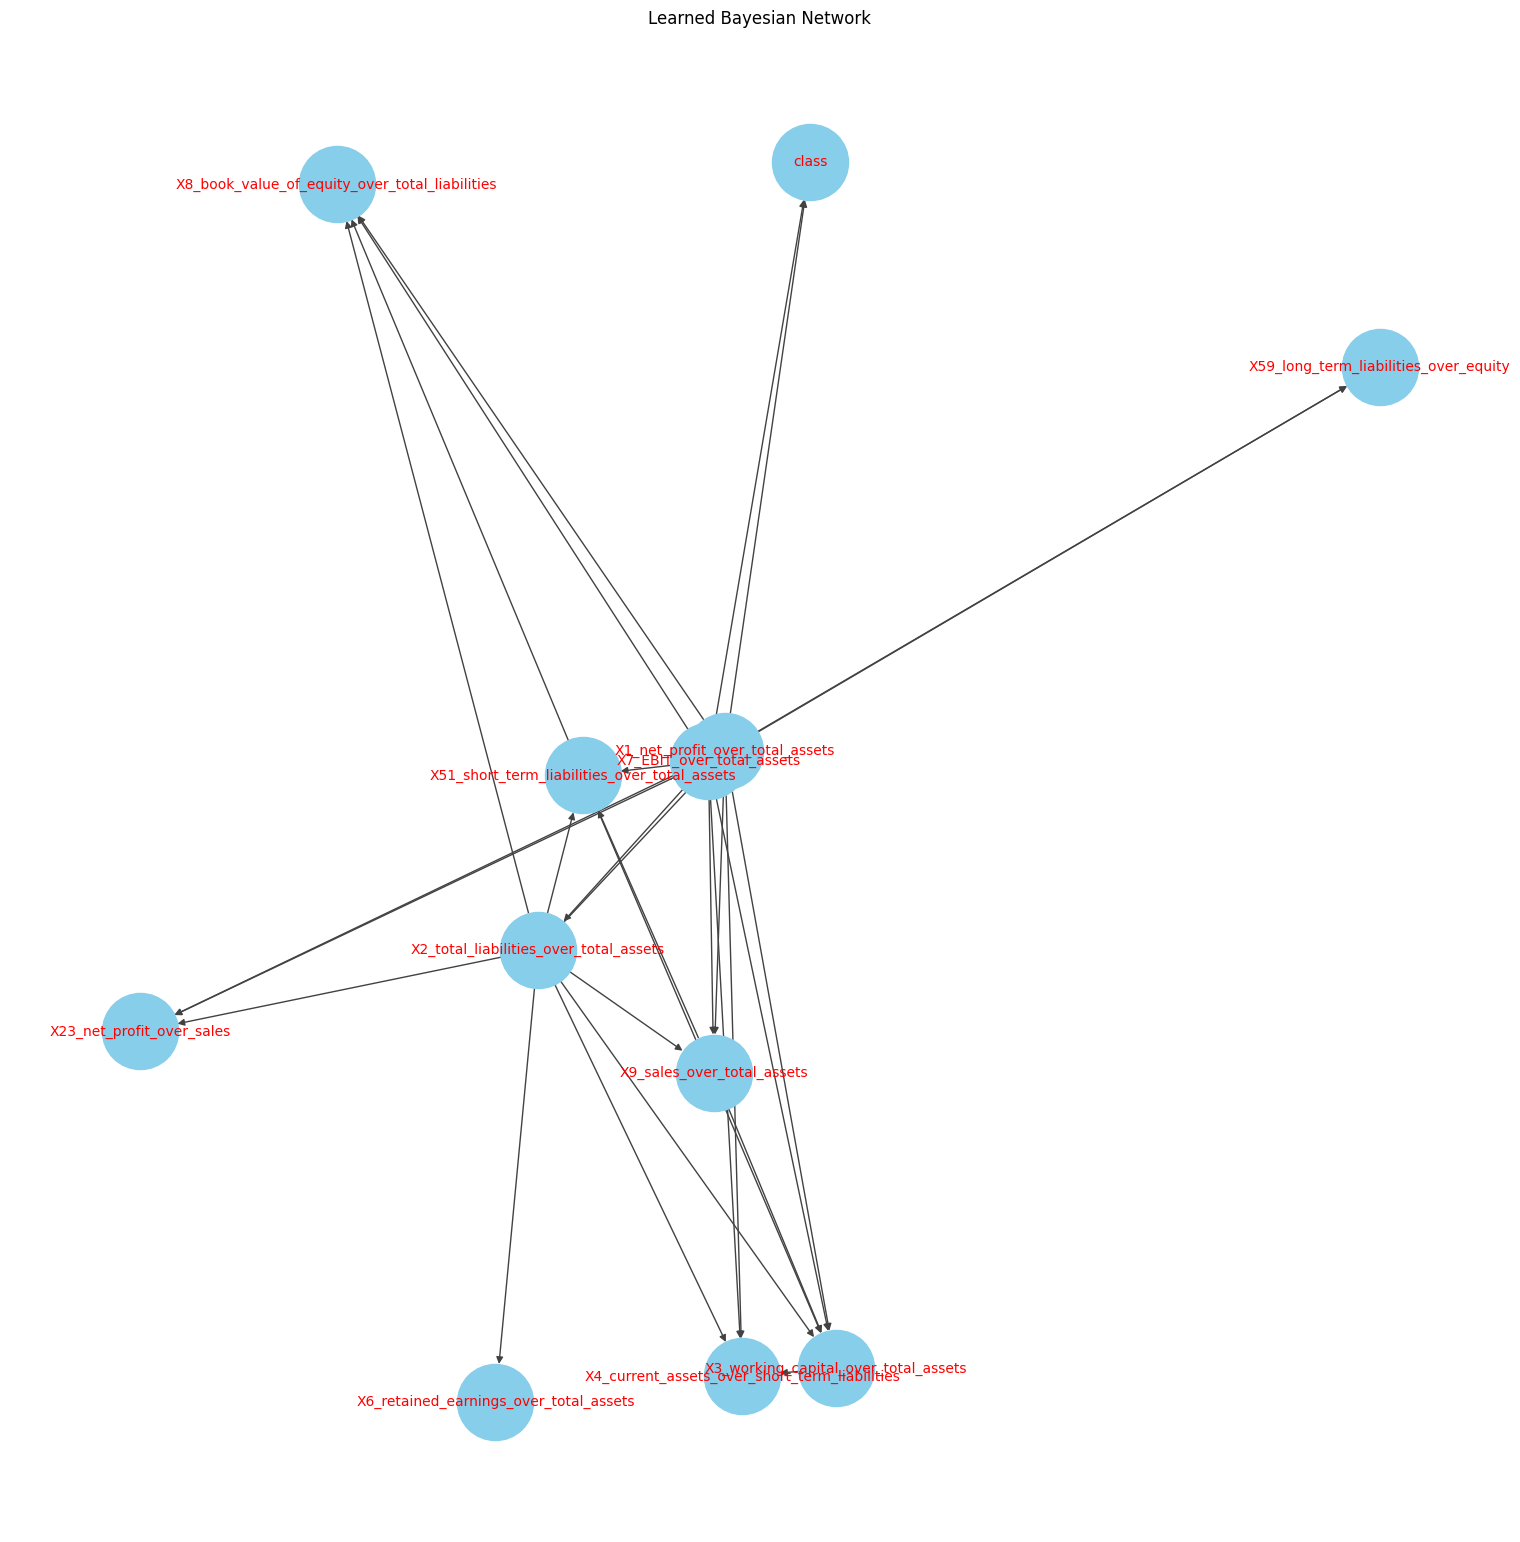

In [43]:
nx_graph = nx.DiGraph(sm.edges())
pos = nx.spring_layout(nx_graph)
plt.figure(figsize=(15, 15))
nx.draw(nx_graph, pos, with_labels=True, node_size=3000, node_color = 'skyblue', edge_color='#424242',font_size=10,font_color='red')
plt.title('Learned Bayesian Network')
plt.show()

Data discretization

In [44]:
atttributes = PreprocessedData.columns.values.tolist()

discretized_dict = {}

est = KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='quantile', subsample=None)
est.fit(PreprocessedData)
PreprocessedData_tranformed = est.transform(PreprocessedData).transpose()


print(np.shape(PreprocessedData_tranformed))
for i in range(len(PreprocessedData_tranformed)):
    discretized_dict[atttributes[i]] = PreprocessedData_tranformed[i]

print(PreprocessedData_tranformed[len(PreprocessedData_tranformed)-1])

discretized_dict[attribute_names[len(data_scaled_transposed)-1]] = pd.cut(data_scaled_transposed[len(data_scaled_transposed)-1],2,labels=[0,1])

discretizedData = pd.DataFrame(discretized_dict)
    
discretizedData

(12, 3031)
[0. 0. 0. ... 0. 0. 0.]


c:\Users\zachs\anaconda3\envs\PGM_causalnex_environment\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\zachs\anaconda3\envs\PGM_causalnex_environment\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 11 are removed. Consider decreasing the number of bins.
  warnings.warn(


,X1_net_profit_over_total_assets,X2_total_liabilities_over_total_assets,X3_working_capital_over_total_assets,X4_current_assets_over_short_term_liabilities,X6_retained_earnings_over_total_assets,X7_EBIT_over_total_assets,X8_book_value_of_equity_over_total_liabilities,X9_sales_over_total_assets,X23_net_profit_over_sales,X51_short_term_liabilities_over_total_assets,X59_long_term_liabilities_over_equity,class
0,8.0,6.0,2.0,2.0,8.0,8.0,4.0,5.0,8.0,9.0,0.0,0
1,6.0,6.0,4.0,4.0,3.0,6.0,5.0,8.0,6.0,8.0,5.0,0
2,9.0,7.0,9.0,6.0,6.0,9.0,4.0,6.0,8.0,10.0,3.0,0
3,8.0,1.0,4.0,10.0,8.0,8.0,11.0,7.0,11.0,0.0,6.0,0
4,9.0,3.0,9.0,9.0,7.0,10.0,9.0,7.0,10.0,2.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3026,4.0,9.0,4.0,3.0,3.0,3.0,2.0,1.0,4.0,10.0,2.0,1
3027,9.0,6.0,9.0,8.0,3.0,9.0,6.0,7.0,10.0,7.0,7.0,1
3028,9.0,11.0,0.0,0.0,0.0,8.0,0.0,11.0,6.0,11.0,0.0,1
3029,0.0,11.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,11.0,0.0,1


Parameter estimation

In [45]:
bn = BayesianNetwork(sm)
bn = bn.fit_node_states(discretizedData)
bn = bn.fit_cpds(training_data, method="BayesianEstimator", bayes_prior="BDeu",equivalent_sample_size=1)
#bn = bn.fit_node_states_and_cpds(training_data, method="BayesianEstimator", bayes_prior="K2")
bn.cpds['class']

X1_net_profit_over_total_assets 0.0                                           \
X7_EBIT_over_total_assets       0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0    
class                                                                          
0                                0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   
1                                0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   

X1_net_profit_over_total_assets       ... 11.0                                \
X7_EBIT_over_total_assets       9.0   ... 2.0  3.0  4.0  5.0  6.0  7.0  8.0    
class                                 ...                                      
0                                0.5  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5   
1                                0.5  ...  0.5  0.5  0.5  0.5  0.5  0.5  0.5   

X1_net_profit_over_total_assets                 
X7_EBIT_over_total_assets       9.0  10.0 11.0  
class                                           
0                                0.5  0.5  0.5  
1                                0.5  0.5  0.5  

[2 rows x 144 columns]

Disctretise Testing data

In [46]:
atttributes = testing_data.columns.values.tolist()

discretized_testing_data_dict = {}

est = KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='quantile', subsample=None)
est.fit(testing_data)
testing_data_tranformed = est.transform(testing_data).transpose()


for i in range(len(testing_data_tranformed)-1):
    discretized_testing_data_dict[atttributes[i]] = testing_data_tranformed[i]


discretized_testing_data_dict[atttributes[len(testing_data.columns.values.tolist())-1]] = pd.cut(testing_data[atttributes[len(testing_data.columns.values.tolist())-1]],2,labels=[0,1])

discretized_testing_Data = pd.DataFrame(discretized_testing_data_dict)
    
discretized_testing_Data

c:\Users\zachs\anaconda3\envs\PGM_causalnex_environment\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\zachs\anaconda3\envs\PGM_causalnex_environment\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 11 are removed. Consider decreasing the number of bins.
  warnings.warn(


,X1_net_profit_over_total_assets,X2_total_liabilities_over_total_assets,X3_working_capital_over_total_assets,X4_current_assets_over_short_term_liabilities,X6_retained_earnings_over_total_assets,X7_EBIT_over_total_assets,X8_book_value_of_equity_over_total_liabilities,X9_sales_over_total_assets,X23_net_profit_over_sales,X51_short_term_liabilities_over_total_assets,X59_long_term_liabilities_over_equity,class
2197,1.0,1.0,11.0,11.0,4.0,1.0,11.0,1.0,1.0,1.0,3.0,0
2198,10.0,5.0,5.0,4.0,8.0,10.0,6.0,6.0,9.0,8.0,0.0,0
2199,6.0,0.0,10.0,10.0,7.0,5.0,11.0,6.0,8.0,1.0,2.0,0
2200,0.0,3.0,4.0,4.0,1.0,0.0,8.0,1.0,0.0,6.0,2.0,0
2201,5.0,3.0,8.0,9.0,5.0,5.0,8.0,5.0,5.0,3.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3026,4.0,10.0,4.0,3.0,3.0,3.0,2.0,1.0,5.0,10.0,2.0,1
3027,9.0,6.0,10.0,8.0,3.0,9.0,5.0,7.0,10.0,7.0,7.0,1
3028,9.0,11.0,0.0,0.0,0.0,8.0,0.0,11.0,6.0,11.0,0.0,1
3029,0.0,11.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,11.0,0.0,1


Inference

In [60]:
#predictions = bn.predict(discretized_testing_Data, "class")
#print(f"The prediction is '{predictions.loc[18, 'class_prediction']}'")
#print(f"The ground truth is '{discretized_testing_Data.loc[18, 'class']}'")
#predictions

print(bn.nodes)
ie = InferenceEngine(bn)



['X1_net_profit_over_total_assets', 'X3_working_capital_over_total_assets', 'X4_current_assets_over_short_term_liabilities', 'X8_book_value_of_equity_over_total_liabilities', 'X9_sales_over_total_assets', 'X23_net_profit_over_sales', 'X59_long_term_liabilities_over_equity', 'class', 'X2_total_liabilities_over_total_assets', 'X6_retained_earnings_over_total_assets', 'X51_short_term_liabilities_over_total_assets', 'X7_EBIT_over_total_assets']


KeyboardInterrupt: 

In [59]:
observations_list = []

for i in range(len(discretized_testing_Data)):
    observations_dict = {}
    for attribute in discretized_testing_Data.columns.values.tolist():
        observations_dict[attribute] = discretized_testing_Data.iloc[i][attribute]
    observations_list.append(observations_dict)
print(observations_list)

predictions = []
for i in range(len(discretized_testing_Data)):
    predictions.append(ie.query(observations = observations_list[i], parallel=True)['class'])
    print(predictions[i])
print(predictions)

[{'X1_net_profit_over_total_assets': 1.0, 'X2_total_liabilities_over_total_assets': 1.0, 'X3_working_capital_over_total_assets': 11.0, 'X4_current_assets_over_short_term_liabilities': 11.0, 'X6_retained_earnings_over_total_assets': 4.0, 'X7_EBIT_over_total_assets': 1.0, 'X8_book_value_of_equity_over_total_liabilities': 11.0, 'X9_sales_over_total_assets': 1.0, 'X23_net_profit_over_sales': 1.0, 'X51_short_term_liabilities_over_total_assets': 1.0, 'X59_long_term_liabilities_over_equity': 3.0, 'class': 0.0}, {'X1_net_profit_over_total_assets': 10.0, 'X2_total_liabilities_over_total_assets': 5.0, 'X3_working_capital_over_total_assets': 5.0, 'X4_current_assets_over_short_term_liabilities': 4.0, 'X6_retained_earnings_over_total_assets': 8.0, 'X7_EBIT_over_total_assets': 10.0, 'X8_book_value_of_equity_over_total_liabilities': 6.0, 'X9_sales_over_total_assets': 6.0, 'X23_net_profit_over_sales': 9.0, 'X51_short_term_liabilities_over_total_assets': 8.0, 'X59_long_term_liabilities_over_equity': 0.

KeyboardInterrupt: 

Model Evaluation

In [13]:
classification_report(bn, discretized_testing_Data, "class")

c:\Users\zachs\anaconda3\envs\PGM_causalnex_environment\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zachs\anaconda3\envs\PGM_causalnex_environment\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zachs\anaconda3\envs\PGM_causalnex_environment\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

{'class_0': {'precision': 0.9669749009247027,
  'recall': 1.0,
  'f1-score': 0.9832102081934183,
  'support': 732.0},
 'class_1': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 25.0},
 'accuracy': 0.9669749009247027,
 'macro avg': {'precision': 0.48348745046235136,
  'recall': 0.5,
  'f1-score': 0.49160510409670916,
  'support': 757.0},
 'weighted avg': {'precision': 0.9350404590183387,
  'recall': 0.9669749009247027,
  'f1-score': 0.950739593655987,
  'support': 757.0}}